In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('Data/Bank Churn/train.csv')
test = pd.read_csv('Data/Bank Churn/test.csv')

In [4]:
sample_submission = pd.read_csv('Data/Bank Churn/sample_submission.csv')

In [5]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [7]:
train[['Age', 'HasCrCard', 'IsActiveMember']] = train[['Age', 'HasCrCard', 'IsActiveMember']].astype(int)
test[['Age', 'HasCrCard', 'IsActiveMember']] = test[['Age', 'HasCrCard', 'IsActiveMember']].astype(int)

In [8]:
train.Exited.unique()

array([0, 1], dtype=int64)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  int32  
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  int32  
 11  IsActiveMember   165034 non-null  int32  
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(2), int32(3), int64(6), object(3)
memory usage: 15.7+ MB


In [10]:
train.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
train = train.drop(['id', 'CustomerId', 'Surname'], axis=1)
test  = test.drop(['id', 'CustomerId', 'Surname'], axis=1)

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Geography'] = le.fit_transform(train['Geography'])
train['Gender'] = le.fit_transform(train['Gender'])

test['Geography'] = le.fit_transform(test['Geography'])
test['Gender'] = le.fit_transform(test['Gender'])

In [13]:
train['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = train.drop('Exited', axis=1).to_numpy()
y = train['Exited'].to_numpy()
test = test.to_numpy()

X = scaler.fit_transform(X)
test = scaler.fit_transform(test)

In [15]:
from imblearn.over_sampling import SMOTE
x_res, y_res = SMOTE().fit_resample(X, y)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)


In [19]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_output)

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     26008
           1       0.91      0.87      0.89     26038

    accuracy                           0.89     52046
   macro avg       0.90      0.89      0.89     52046
weighted avg       0.90      0.89      0.89     52046



<Axes: xlabel='Balance', ylabel='Density'>

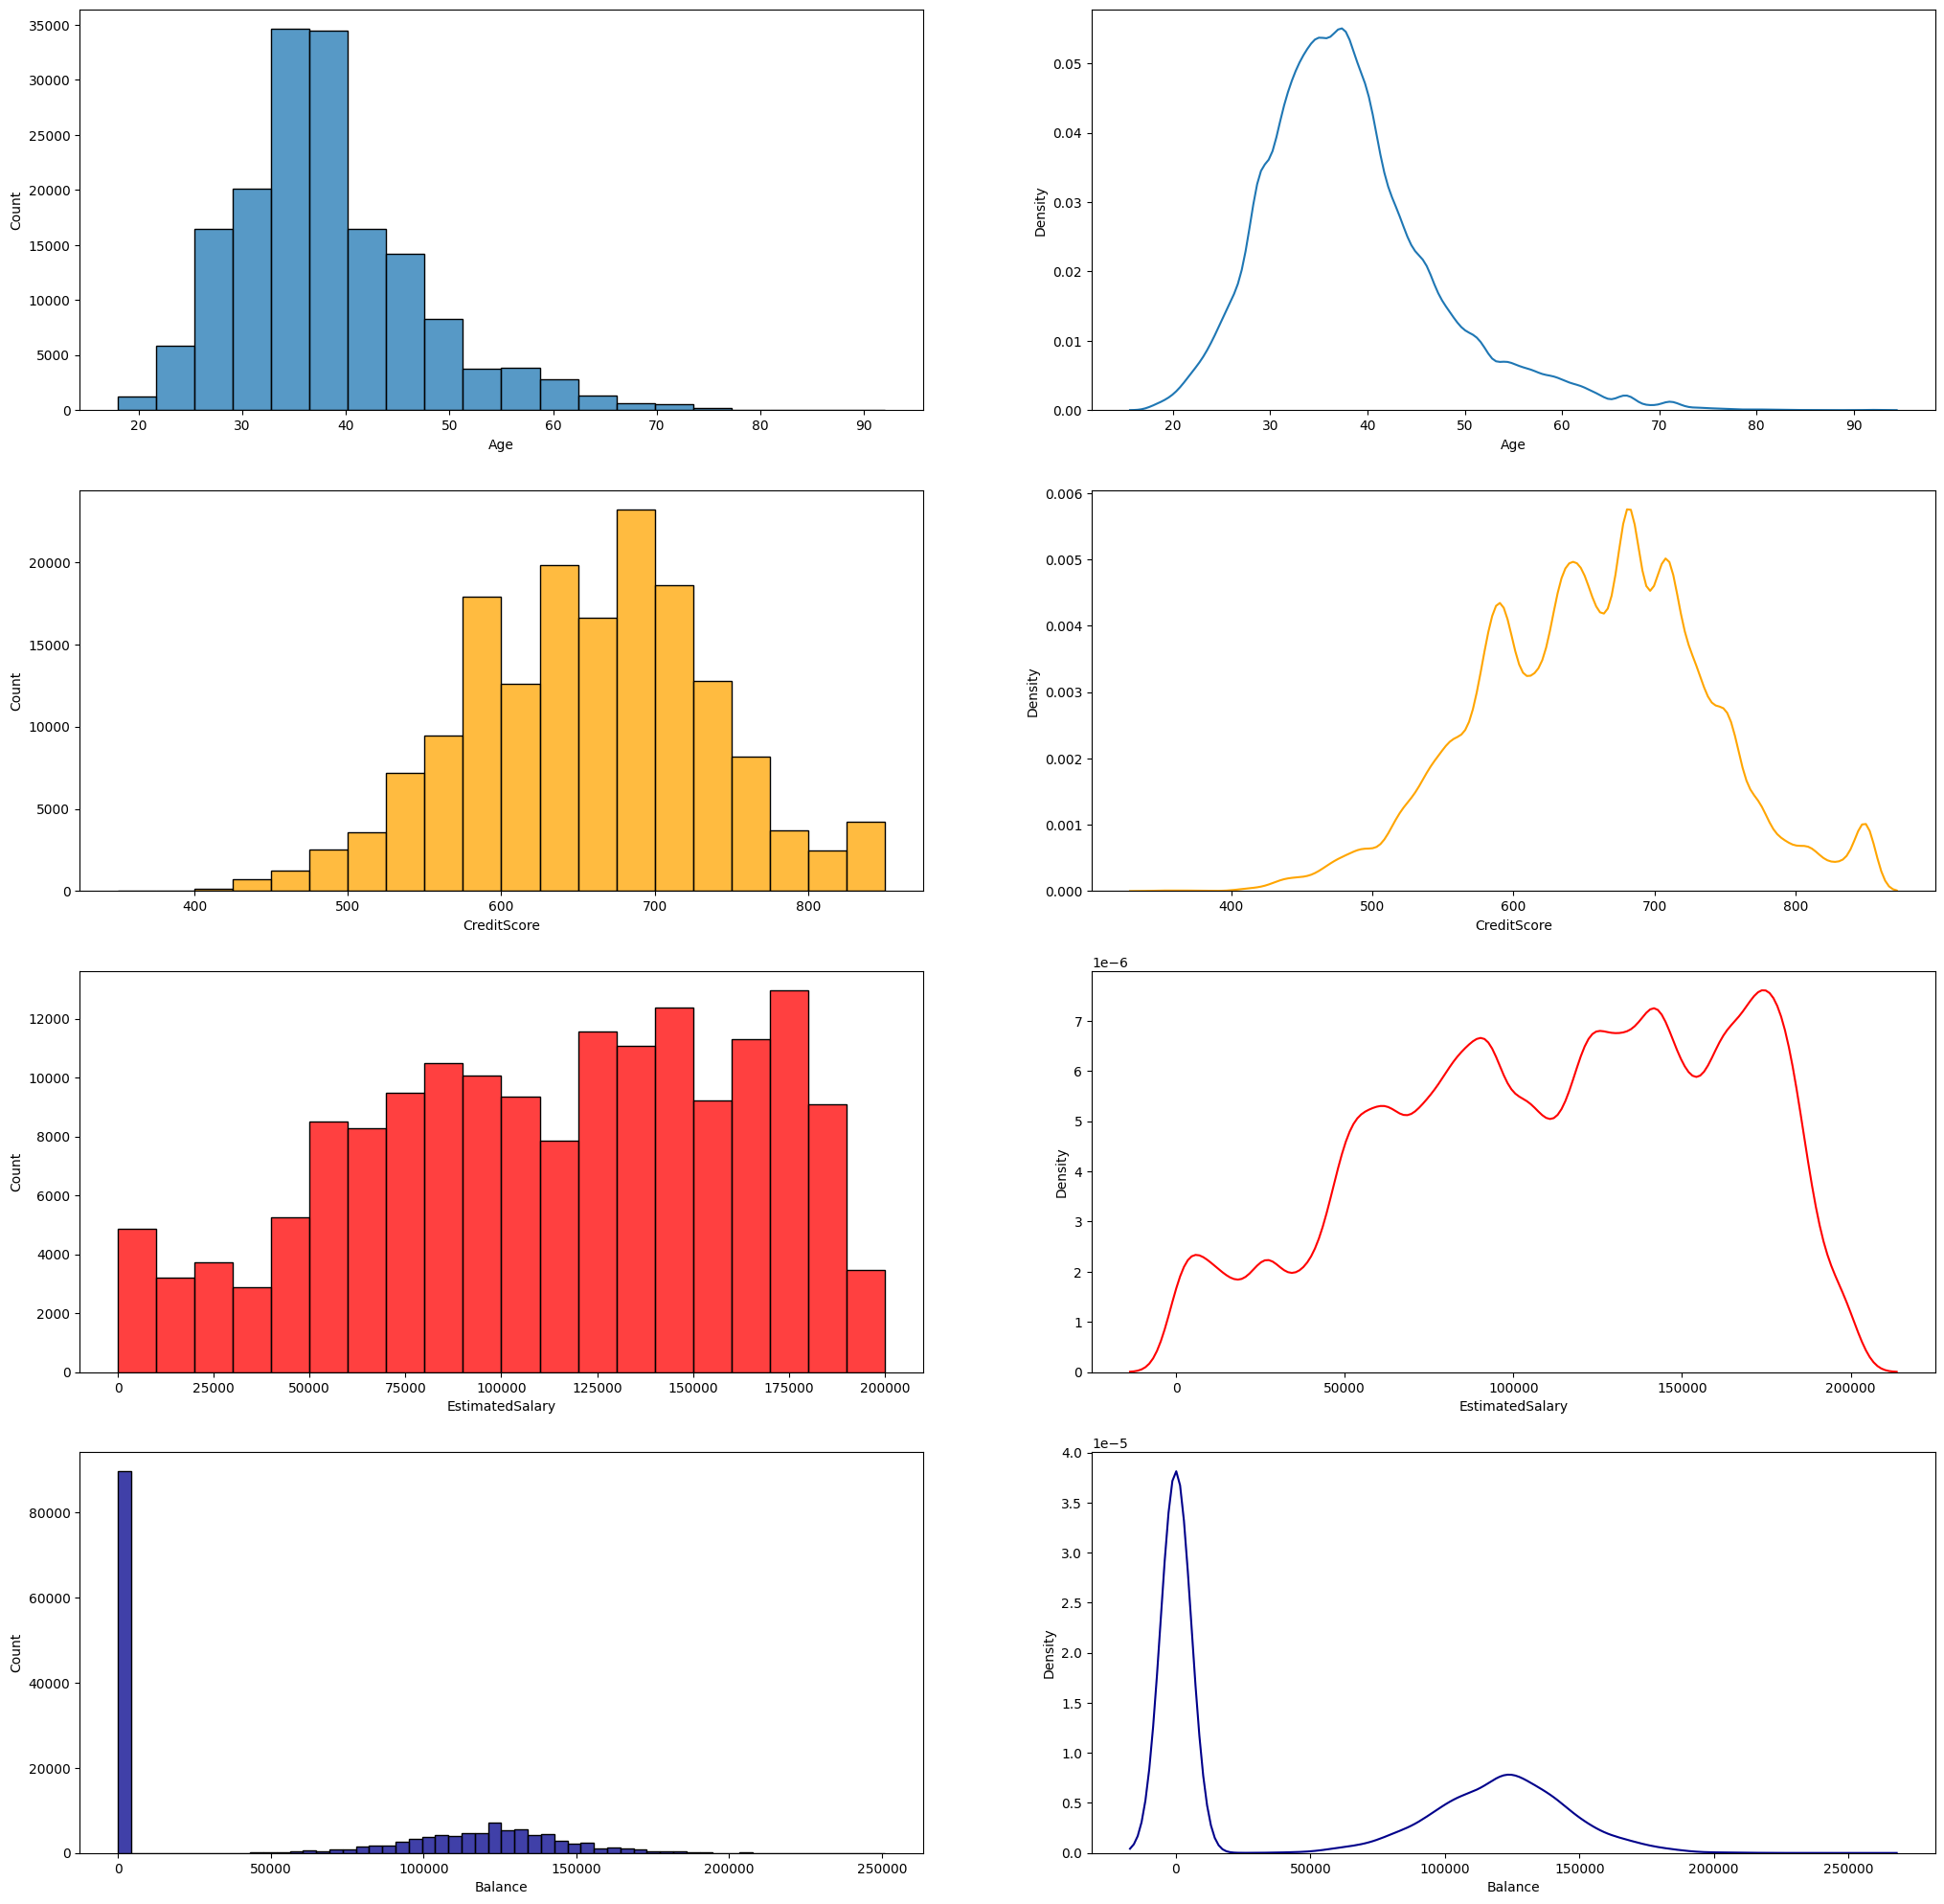

In [25]:
fig,ax=plt.subplots(ncols=2,nrows=4,figsize=(25,25))

sns.histplot(data=train,x="Age",ax=ax[0,0],bins=20)
sns.kdeplot(data=train,x="Age",ax=ax[0,1])
sns.histplot(data=train,x="CreditScore",ax=ax[1,0],bins=20,color="orange")
sns.kdeplot(data=train,x="CreditScore",ax=ax[1,1],color="orange")
sns.histplot(data=train,x="EstimatedSalary",ax=ax[2,0],bins=20,color="red")
sns.kdeplot(data=train,x="EstimatedSalary",ax=ax[2,1],color="red")
sns.histplot(data=train,x="Balance",ax=ax[3,0],color="darkblue")
sns.kdeplot(data=train,x="Balance",ax=ax[3,1],color="darkblue")